## Content
* Exploratory Data Analysis [EDA]
* Feature Engineering
* Modeling 
* Evaluate Model & Tuning


### Required Tools
| Library | Description |
| ----------- | ----------- |
| [numpy](https://numpy.org) | adding support for large, multi-dimensional arrays and matrices |
| [pandas](https://pandas.pydata.org) | for data manipulation and analysis. |
| [sciket-learn](https://scikit-learn.org) | it features various classification, regression and clustering algorithms including support vector machines|
| [matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org)| is a plotting library |


# Goal for the project
<style>
  .center {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
</style>
<img src="https://yallabook.com/app/webroot/blog/uploade/files/191014_65e0a11f00.jpg"  alt="Titanic" width="80%" height="500px" class="center">


### Titanic
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date.With much public attention in the aftermath, the disaster has since been the material of many artistic works and a founding material of the disaster film genre.

### Titanic Dataset
Details can be obtained on 891 passengers and crew on board the ship Titanic, Summary statistics for the categorical variables can be demonstrated and the cost of the ticket (fare) is very skewed so it can be used to demonstrate skewed data and differences between means and medians etc.  Data contains Cloumns:
* passenger_id: ID for each Passenger.
* Name: Passenger name.
* Age: passenger age. 
* Sex: passenger sex (Male, Female).
* Ticket: passengers' Ticket number.
* Pclass: Trip class (1, 2, 3).
* Sibsp: Number of Siblings/Spouses Aboard.
* Parch: Number of Parents/Children Aboard.
* Fare:  price of Ticket
* Cabin: Cabin Number
* Embarked: implies where the traveler mounted from
* Survived: whether passenger survived or not (0, 1).

**Target value** for new passenger,  Predict whether survived/not

# Data Handling
Below is a summary of our data contained in a Pandas DataFrame. Think of a DataFrame as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train_data = pd.read_csv('titanic.csv')  # load data into dataframe

In [42]:
# data shape
train_data.shape

(891, 12)

In [43]:
# display columns name
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
Data_dict = pd.DataFrame(train_data.dtypes)
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict['Missing Values'] = train_data.isnull().sum()
Data_dict['Unique Values'] = train_data.nunique()


Data_dict

,DataType,Missing Values,Unique Values
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [45]:
train_data.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
# get discriptive statistics on "objects" datatypes
train_data.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Take a look Visually
The point of this project is to predict if an individual will survive based on the features in the data like:
* Pclass
* Age
* Sex
* ... etc.
  

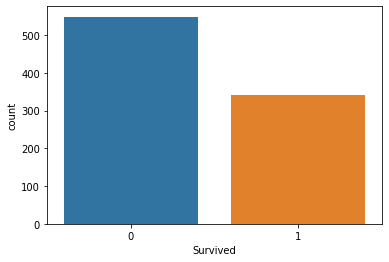

In [47]:
# count number of survivors
_ = sns.countplot(x='Survived',data=train_data)


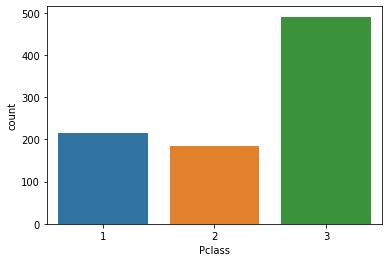

In [48]:
_ = sns.countplot(x='Pclass',data=train_data)


<AxesSubplot:>

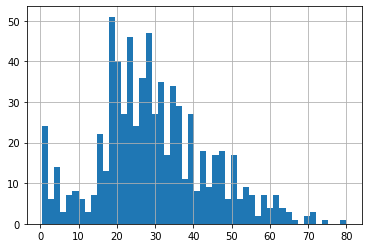

In [49]:
# count Age
train_data['Age'].hist(bins=50)

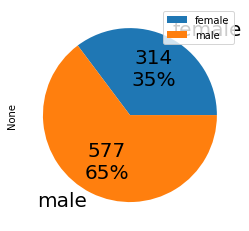

In [50]:
def label_function(val):
    return f'{val / 100 * len(train_data):.0f}\n{val:.0f}%'
    
train_data.groupby('Sex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})
plt.legend()

C:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-51-f3bcf3ba4ad4>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


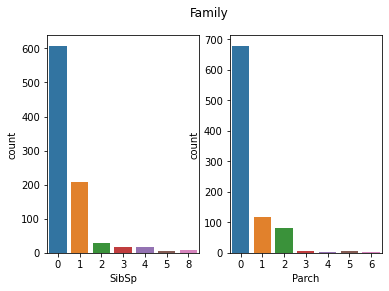

In [51]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Family')
sns.countplot(train_data['SibSp'], ax=ax[0])
sns.countplot(train_data['Parch'], ax=ax[1])

fig.show()

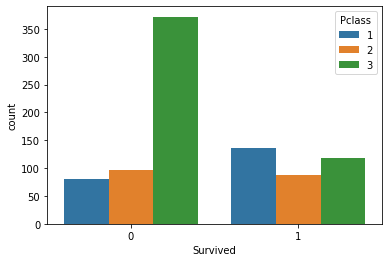

In [52]:
# count of survived based on passenger class
_ = sns.countplot(x='Survived',hue='Pclass',data=train_data)


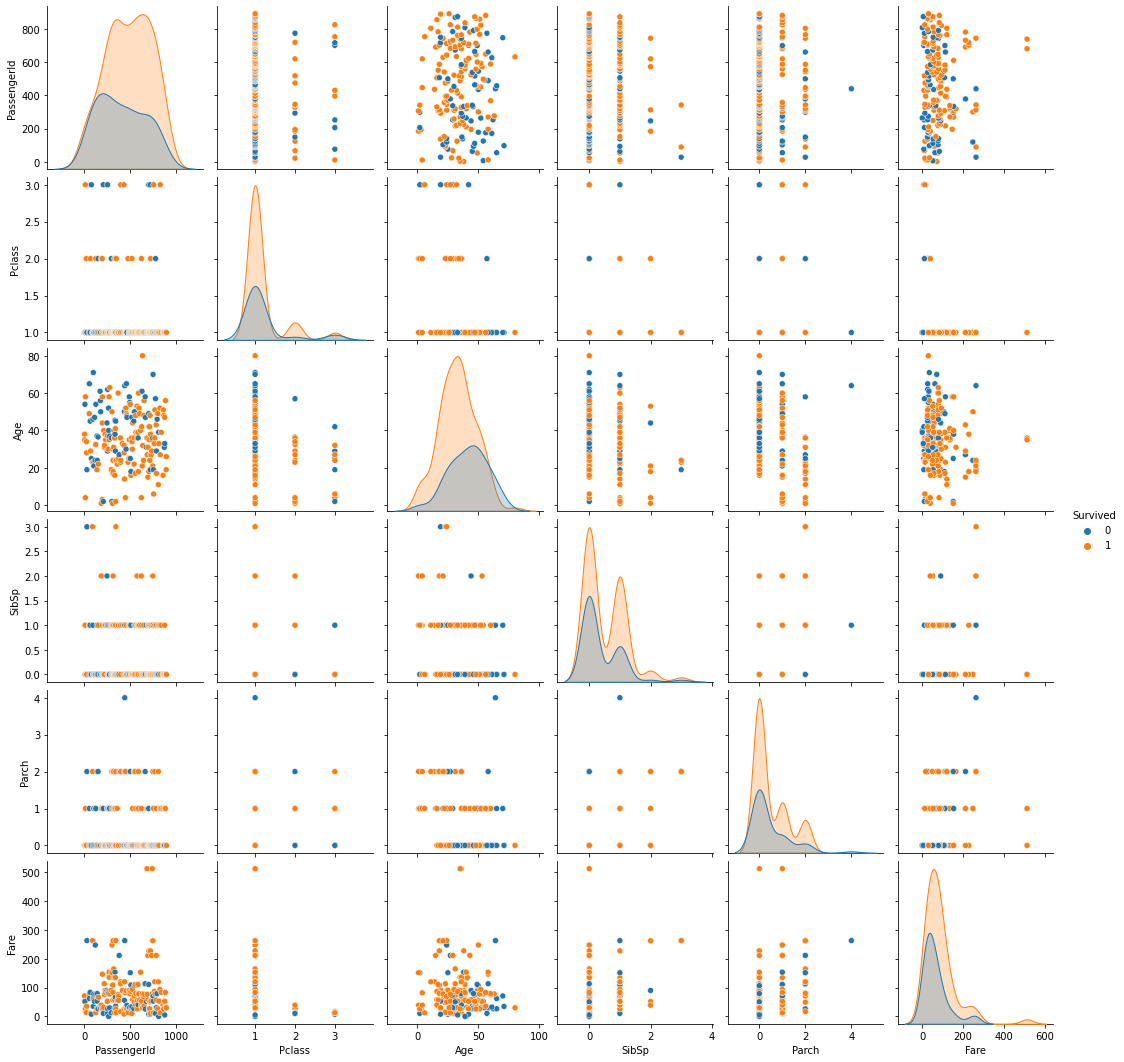

In [53]:
sns.pairplot(train_data.dropna(),hue = "Survived")


<ipython-input-54-ddf076795d82>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


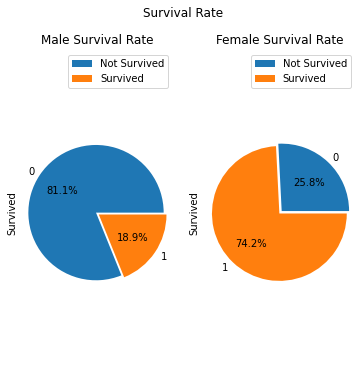

In [54]:
fig, ax = plt.subplots(1, 2)


train_data[train_data['Sex'] == 'male'].Survived.groupby(train_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%', ax=ax[0])
ax[0].axis('equal')
ax[0].set_title('Male Survival Rate')
ax[0].legend(["Not Survived","Survived"])

train_data[train_data['Sex'] == 'female'].Survived.groupby(train_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%', ax=ax[1])
ax[1].axis('equal')
ax[1].set_title('Female Survival Rate')
ax[1].legend(["Not Survived","Survived"])

fig.suptitle('Survival Rate')
fig.show()



In [55]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [56]:
pd.crosstab(train_data.SibSp, train_data.Survived, margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [57]:
pd.crosstab(train_data.Parch, train_data.Survived, margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


<ipython-input-58-f7e450808372>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


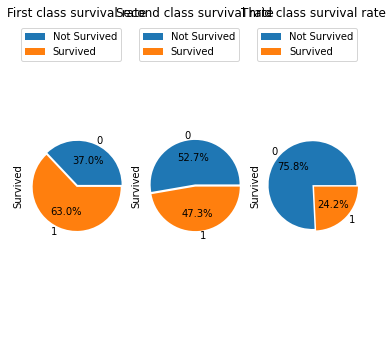

In [58]:
fig, ax = plt.subplots(1, 3)

train_data[train_data['Pclass'] == 1].Survived.groupby(train_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%', ax=ax[0])
ax[0].axis('equal')
ax[0].legend(["Not Survived","Survived"])
ax[0].set_title("First class survival rate")

train_data[train_data['Pclass'] == 2].Survived.groupby(train_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%', ax=ax[1])
ax[1].axis('equal')
ax[1].legend(["Not Survived","Survived"])
ax[1].set_title("Second class survival rate")

train_data[train_data['Pclass'] == 3].Survived.groupby(train_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%', ax=ax[2])
ax[2].axis('equal')
ax[2].legend(["Not Survived","Survived"])
ax[2].set_title("Thrid class survival rate")

fig.show()

# Data Pre-Proccessing
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:



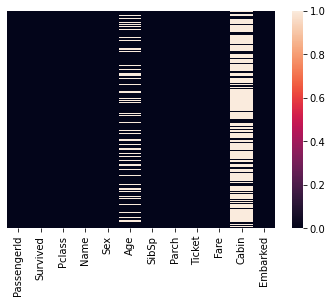

In [59]:
# 2. Data Pre-proccessing

# remove duplicates
train_data = train_data.drop_duplicates()

# missing values
_ = sns.heatmap(train_data.isnull(), yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

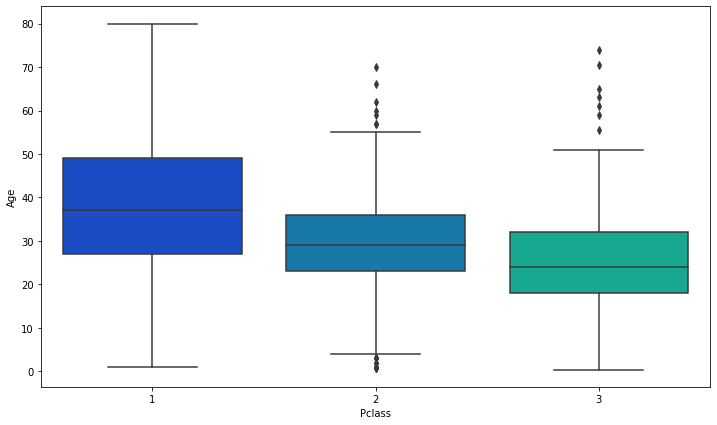

In [60]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

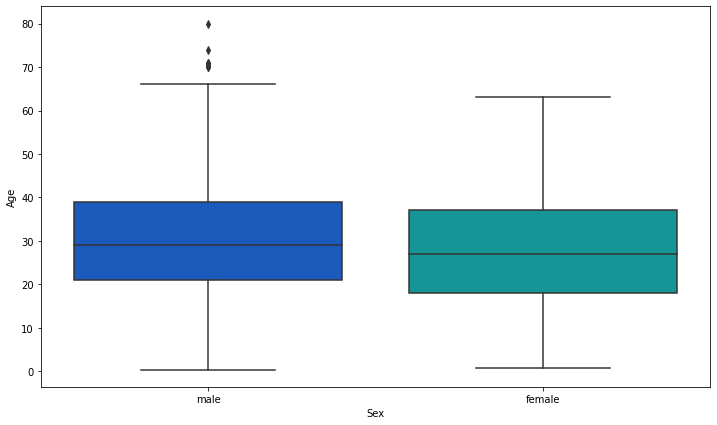

In [61]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=train_data,palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

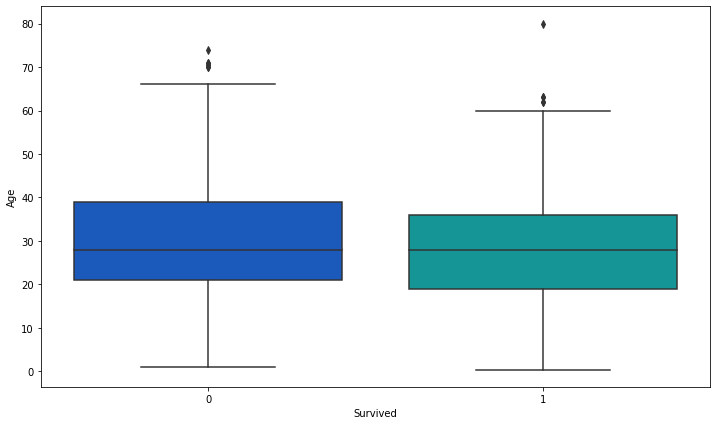

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Survived',y='Age',data=train_data,palette='winter')

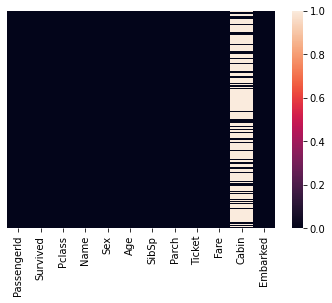

In [63]:
train_data['Age'] = train_data['Age'].fillna(float(int(train_data['Age'].mean())))
_ = sns.heatmap(train_data.isnull(), yticklabels=False)

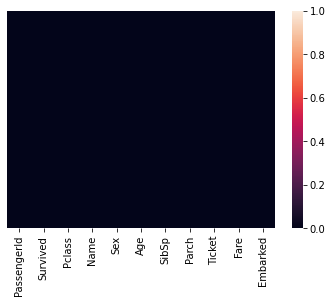

In [64]:
train_data = train_data.drop('Cabin', axis=1)
_ = sns.heatmap(train_data.isnull(), yticklabels=False)

### Feature Engineering

In [65]:
FEATURES = ['Age', 'Pclass', 'Sex', 'SibSp', 'Parch']

X = train_data[FEATURES]
y = train_data['Survived']

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range =(0, 1))

X['Sex'] = [1 if s == 'male' else 0 for s in X['Sex'] ]
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X

<ipython-input-66-072c22d9bced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = [1 if s == 'male' else 0 for s in X['Sex'] ]


,0,1,2,3,4
0,0.271174,1.0,1.0,0.125,0.000000
1,0.472229,0.0,0.0,0.125,0.000000
2,0.321438,1.0,0.0,0.000,0.000000
3,0.434531,0.0,0.0,0.125,0.000000
4,0.434531,1.0,1.0,0.000,0.000000
...,...,...,...,...,...
886,0.334004,0.5,1.0,0.000,0.000000
887,0.233476,0.0,0.0,0.000,0.000000
888,0.359135,1.0,0.0,0.125,0.333333
889,0.321438,0.0,1.0,0.000,0.000000


In [72]:

# Import Necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


# Initialize a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, random_state=0)
rf.fit(X_train, y_train)

# Predict from the test set
y_pred = rf.predict(X_test)

In [74]:
# 5. evaluate your model prodections

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8582089552238806

Confusion Matrix

[[155  10]
 [ 28  75]]
